In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [45]:
df = pd.read_csv('BankNote_Authentication.csv')

In [46]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [47]:
df['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

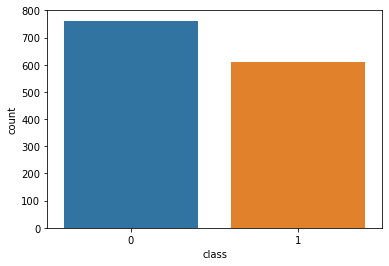

In [48]:
sns.countplot(df['class'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [50]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [51]:
X = df.iloc[:,:-1]
y = df['class']

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [53]:
model = RandomForestClassifier()

In [54]:
_= model.fit(X_train, y_train)

In [55]:
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.9951456310679612

In [56]:
pickle_out = open('classifier.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [57]:
model.predict([[2,3.5,5,6]])

array([0], dtype=int64)

In [58]:
pred = model.predict([[2,3.5,5,6]])

In [59]:
if pred[0] > 0.5:
    print("Fake Note")
else:
    print("Its a Bank Note")

Its a Bank Note
